<br>
<img style="float:left" src="http://ipython.org/_static/IPy_header.png" />
<br>

# Session 1: Orientation

<br>
Welcome to the *IPython Notebook*. Through this interface, you'll be learning a lot of things:

* A Programming language: **Python**
* A Python library: **NLTK**
* Overlapping research areas: **Corpus linguistics**, **Natural language processing**, **Distant reading**
* Additional skills: **Regular Expressions**, some **Shell commands**, and **tips on managing your data**

You can head [here](https://github.com/resbaz/lessons/blob/master/nltk/README.md) for the fully articulated overview of the course, but we'll almost always stay within IPython. 
Remember, everything we cover here will remain available to you after ResBaz is over, including these Notebooks. It's all accessible at the [ResBaz GitHub](https://github.com/resbaz/lessons/tree/master/nltk).

**Any questions before we begin?**

Alright, we're off!

## Text as data

Programming languages like Python are great for processing data. In order to apply it to *text*, we need to think about our text as data.
This means being aware of how text is structured, what extra information might be encoded in it, and how to manage to give the best results. 

## What is the Natural Language Toolkit?

<br>
We'll be covering some of the theory behind corpus linguistics later on, but let's start by looking at some of the tasks NLTK can help you with. 

NLTK is a Python Library for working with written language data. It is free and extensively documented. Many areas we'll be covering are treated in more detail in the NLTK Book, available free online from [here](http://www.nltk.org/book/).

> Note: NLTK provides tools for tasks ranging from very simple (counting words in a text) to very complex (writing and training parsers, etc.). Many advanced tasks are beyond the scope of this course, but by the time we're done, you should understand Python and NLTK well enough to perform these tasks on your own!

We will start by importing NLTK, setting a path to NLTK resources, and downloading some additional stuff.

In [1]:
# clear output from download
from IPython.display import display, clear_output
# import: all the nltk basics
import nltk

Oh, we've got to import some corpora used in the book as well...

In [2]:
from nltk.book import *  
# asterisk means 'everything'

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


Importing the book has assigned variable names to ten corpora. We can call these names easily: 

In [3]:
text2
#text3

<Text: Sense and Sensibility by Jane Austen 1811>

### Exploring vocabulary

NLTK makes it really easy to get basic information about the size of a text and the complexity of its vocabulary.

*len* gives the number of symbols or 'tokens' in your text. This is the total number of words and items of punctuation.

*set* gives you a list of all the tokens in the text, without the duplicates.

Hence, **len(set(text3))** will give you the total number unique tokens. Remember this still includes punctuation. 

sorted* places items in the list into alphabetical order, with punctuation symbols and capitalised words first.

In [4]:
len(text3)

44764

In [5]:
len(set(text3))

2789

In [6]:
sorted(set(text3)) [25:35]

[u'Achbor',
 u'Adah',
 u'Adam',
 u'Adbeel',
 u'Admah',
 u'Adullamite',
 u'After',
 u'Aholibamah',
 u'Ahuzzath',
 u'Ajah']

We can investigate the *lexical richness* of a text. For example, by dividing the total number of words by the number of unique words, we can see the average number of times each word is used. 
We can also count the number of times a word is used and calculate what percentage of the text it represents.

In [7]:
len(text3)/len(set(text3))

16

In [8]:
text4.count("American")

147

**Challenge!** 

How would you calculate the percentage of Text 4 that is taken up by the word "America"?

In [9]:
100.0*text4.count("America")/len(text4) 

0.13174597728754245

### Exploring text - concordances, similar contexts, dispersion

'Concordance' shows you a word in context and is useful if you want to be able to discuss the ways in which a word is used in a text. 
'Similar' will find words used in similar contexts; remember it is not looking for synonyms, 
although the results may include synonyms

In [10]:
text1.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


In [11]:
text1.similar("monstrous")

imperial subtly impalpable pitiable curious abundant perilous
trustworthy untoward singular lamentable few determined maddens
horrible tyrannical lazy mystifying christian exasperate


In [12]:
text2.similar("monstrous")

very exceedingly so heartily a great good amazingly as sweet
remarkably extremely vast


In [13]:
text2.common_contexts(["monstrous", "very"])  # this function takes two arguments

a_pretty is_pretty a_lucky am_glad be_glad


We can also find words that typically occur together, which tend to be very specific to a text or genre of texts. We'll talk more about these features and how to use them later.

In [59]:
text4.collocations()

United States; fellow citizens; four years; years ago; Federal
Government; General Government; American people; Vice President; Old
World; Almighty God; Fellow citizens; Chief Magistrate; Chief Justice;
God bless; every citizen; Indian tribes; public debt; one another;
foreign nations; political parties


Python also lets you create graphs to display data.
To represent information about a text graphically, import the Python library *numpy*. We can then generate a dispersion plot that shows where given words occur in a text.

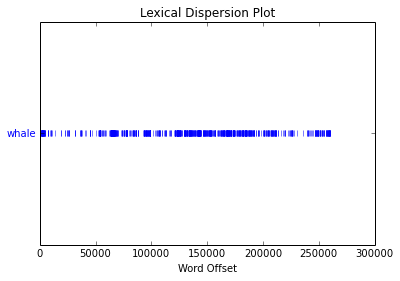

In [14]:
import numpy
%matplotlib inline
text1.dispersion_plot(["whale"])

In [15]:
text1.count('whale')

906

**Challenge!**
<br>
Create a dispersion plot for the terms "citizens", "democracy", "freedom", "duties" and "America" in the innaugural address corpus.
What do you think it tells you? 

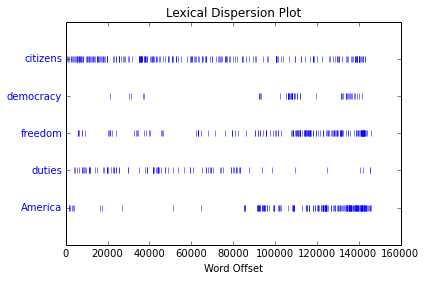

In [16]:
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"]) # plot five words longitudinally

## The IPython Notebook

So, we've been writing Python code in an IPython notebook. Why?

1. The main strength of IPython is that you can run bits of code individually, so you don't have to keep repeating things. For example, if you scroll up to the last function and replace the 50 with 2, you can re-run that code and get the new answer. 
2. IPython allows you to display images alongside code, and to save the input and output together.
3. IPython makes learning a bit easier, as mistakes are easier to find and do not break an entire workflow.

You can get more information on IPython, including how to install it on your own machine, at the [IPython Homepage](http://ipython.org).

### Significant Whitespace

One thing that makes Python unique is that whitespace at the start of the line (use four spaces for consistency!) is meaningful. 
In many other languages, whitespace at the start of lines is simply a readability convention.

In [17]:
# Fix this whitespace problem!

string = 'user'
if string == 'user':
    print 'Phew, fixed.'

Phew, fixed.


So, whitespace tells both Python and human readers where things start and stop.

### Defining a function

Next, we'll talk about *functions*. Here's an example:

In [18]:
def welcomer(name):
    print 'Welcome, %s!' % name
# here '%s' tells Python to expect a string and how many strings to expect.  

Notice that it doesn't do anything by itself. It needs to actually be *called*, and given some data:

In [19]:
welcomer('Kim')

Welcome, Kim!


Advantages of functions:
1. Save you typing
2. You can be sure you're doing exactly the same operation every time
<br>
> **Note** Learn to love tab-completion! Typing the first one or two letters of a command you've used previously then hitting tab 
will auto-complete that command, saving you typing (i.e. time and mistakes!). 

You may wish to repeat an operation multiple times looking at different texts or different terms within a text. Instead of re-entering the formula every time, you can assign a name and set of actions to a particular task.

Previously, we calculated the lexical diversity of a text. In NLTK, we can create a function called **lexical diversity** that runs a single line of code. We can then call this function to quickly determine the lexical density of a corpus or subcorpus.
<markdown cell>
**Challenge!**

Write a function to calculate the lexical diversity of a text; test it out on the books in the NLTK corpus

In [20]:
def lexical_diversity(text):
    return len(text)/len(set(text))

In [21]:
#After the function has been defined, we can run it:
lexical_diversity(text2)

20

The parentheses are important here as they sepatate the the task, that is the work of the function, from the data that the function is to be performed on. 

The data in parentheses is called the argument of the function. When we use a function, we say that we 'call' it. 

Other functions that we've used already include len() and sorted() - these were predefined. *lexical_diversity()* is one we set up ourselves; note that it's conventional to put a set of parentheses after a function, to make it clear what we're talking about.

### Lists

Python treats a text as a long list of words. First, we'll make some lists of our own, to give you an idea of how a list behaves.

In [22]:
sent1 = ['Call', 'me', 'Ishmael', '.']
# Note we use Square brackets here to define our list

In [23]:
sent1

['Call', 'me', 'Ishmael', '.']

In [24]:
len(sent1)

4

The opening sentences of each of our texts have been pre-defined for you. You can inspect them by typing in 'sent2' etc.

You can add lists together, creating a new list containing all the items from both lists. You can do this by typing out the two lists or you can add two or more pre-defined lists. This is called concatenation.

In [25]:
sent4 + sent1

['Fellow',
 '-',
 'Citizens',
 'of',
 'the',
 'Senate',
 'and',
 'of',
 'the',
 'House',
 'of',
 'Representatives',
 ':',
 'Call',
 'me',
 'Ishmael',
 '.']

We can also add an item to the end of a list by appending. When we append(), the list itself is updated. 

In [26]:
sent1.append('Please')
sent1

['Call', 'me', 'Ishmael', '.', 'Please']

**Extension: Loops**

We can ask Python to do something, such as performing a function, all items in a list. For instance, we could ask it to tell us the size of all the files in a directory. We do this by creating something called a *loop*.

In [27]:
fruits = ['banana', 'apple', 'mango']
for fruit in fruits:        
    print 'Current fruit :', fruit
print 'Done!'

Current fruit : banana
Current fruit : apple
Current fruit : mango
Done!


**Challenge** 

Define a list called Library with the 9 NLTK books in it. Write a for loop that will run our lexical_diversity() function over each book and tell you its score.

In [28]:
Library = [text1, text2, text3, text4, text5, text6, text7, text8, text9]
for book in Library:
    score = lexical_diversity(book)
    print book, score

<Text: Moby Dick by Herman Melville 1851> 13
<Text: Sense and Sensibility by Jane Austen 1811> 20
<Text: The Book of Genesis> 16
<Text: Inaugural Address Corpus> 14
<Text: Chat Corpus> 7
<Text: Monty Python and the Holy Grail> 7
<Text: Wall Street Journal> 8
<Text: Personals Corpus> 4
<Text: The Man Who Was Thursday by G . K . Chesterton 1908> 10


###  Indexing Lists

We can navigate this list with the help of indexes. Just as we can find out the number of times a word occurs in a text, we can also find where a word first occurs. We can navigate to different points in a text without restriction, so long as we can describe where we want to be.

In [29]:
print text4.index('awaken')

173


This works in reverse as well. We can ask Python to locate the 158th item in our list (note that we use square brackets here, not parentheses)

In [30]:
print text4[158]

the


As well as pulling out individual items from a list, indexes can be used to pull out selections of text from a large corpus to inspect. We call this slicing

In [31]:
print text5[16715:16735]

[u'U86', u'thats', u'why', u'something', u'like', u'gamefly', u'is', u'so', u'good', u'because', u'you', u'can', u'actually', u'play', u'a', u'full', u'game', u'without', u'buying', u'it']


If we're asking for the beginning or end of a text, we can leave out the first or second number. For instance, [:5] will give us the first five items in a list while [8:] will give us all the elements from the eighth to the end. 

In [32]:
print text2[:10]
print text4[145700:]

[u'[', u'Sense', u'and', u'Sensibility', u'by', u'Jane', u'Austen', u'1811', u']', u'CHAPTER']
[u'upon', u'us', u',', u'we', u'carried', u'forth', u'that', u'great', u'gift', u'of', u'freedom', u'and', u'delivered', u'it', u'safely', u'to', u'future', u'generations', u'.', u'Thank', u'you', u'.', u'God', u'bless', u'you', u'.', u'And', u'God', u'bless', u'the', u'United', u'States', u'of', u'America', u'.']


To help you understand how indexes work, let's create one.

We start by defining the name of our index and then add the items. You probably won't do this in your own work, but you may want to manipulate an index in other ways. Pay attention to the quote marks and commas when you create your test sentence.

In [33]:
sent = ['The', 'quick', 'brown', 'fox']
print sent[0]
print sent[2]

The
brown


Note that the first element in the list is zero. This is because we are telling Python to go zero steps forward in the list. If we use an index that is too large (that is, we ask for something that doesn't exist), we'll get an error.

We can modify elements in a list by assigning new data to one of its index values. We can also replace a slice with new material.

In [34]:
sent[2] = 'furry'
sent[3] = 'child'
print sent

['The', 'quick', 'furry', 'child']


###  Defining variables

In Python, we give the items we're working with names, a process called assignment. For instance, in the NLTK corpus, 'Sense and Sensibility' has been assigned the name 'text2', which is much easier to work with. 
We also assigend the name 'sent' to the sentence that we created in the previous exercise, so that we could then instruct Python to do various things with it. Assigning a variable in python looks like this:  
variable = expression   
You can call your variables (almost) anything you like, but it's a good idea to pick names that will be meaningful and easy to type. You can't use words that already have a meaning in Python, such as import, def, or not. If you try to use a word that is reserved, you'll get a syntax error.

**Challenge**

- Create a list called 'opening' that consists of the phrase "It was a dark and stormy night; the rain fell in torrents"
- Create a variable called 'clause' that contains the contents of 'opening', up to the semi-colon
- Create a variable called 'alphabetised' that contains the contents of 'clause' sorted alphabetically
- Print 'alphabetised' 

In [35]:
opening = ['It', 'was', 'a', 'dark', 'and', 'stormy', 'night', ';', 'the', 'rain', 'fell', 'in', 'torrents']
clause = opening[0:7]
alphabetised = sorted(clause)

Note that assigning a variable just causes Python to remember that information without generating any output. 

If you want Python to show you the result, you have to ask for it (this is a good thing when you assign a variable to a very long list!).

In [36]:
print clause

['It', 'was', 'a', 'dark', 'and', 'stormy', 'night']


In [37]:
print alphabetised

['It', 'a', 'and', 'dark', 'night', 'stormy', 'was']


### Frequency distributions

We can use Python's ability to perform statistical analysis of data to do further exploration of vocabulary. For instance, we might want to be able to find the most common or least common words in a text. We'll start by looking at frequency distribution.

In [38]:
from nltk.probability import FreqDist
from collections import Counter
fdist1 = FreqDist(text1)

In [ ]:
fdist1.most_common(50)

In [41]:
fdist1['whale']

906

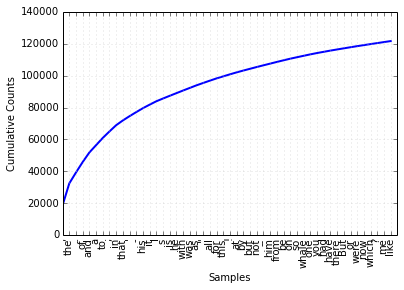

In [42]:
fdist1.plot(50, cumulative = True)

**Challenge!**

Let's compare the 15 most common tokens of the texts in the NLTK book. You could do this manually, but it will save you time and typing if you define a function and then loop it over the list, 'Library', that you created earlier.


In [52]:
def common_words(text):
    return FreqDist(text).most_common(15)
common_words(text1)

[(u',', 18713),
 (u'the', 13721),
 (u'.', 6862),
 (u'of', 6536),
 (u'and', 6024),
 (u'a', 4569),
 (u'to', 4542),
 (u';', 4072),
 (u'in', 3916),
 (u'that', 2982),
 (u"'", 2684),
 (u'-', 2552),
 (u'his', 2459),
 (u'it', 2209),
 (u'I', 2124)]

In [53]:
for book in Library:
    words = common_words(book)
    print book, words 

<Text: Moby Dick by Herman Melville 1851> [(u',', 18713), (u'the', 13721), (u'.', 6862), (u'of', 6536), (u'and', 6024), (u'a', 4569), (u'to', 4542), (u';', 4072), (u'in', 3916), (u'that', 2982), (u"'", 2684), (u'-', 2552), (u'his', 2459), (u'it', 2209), (u'I', 2124)]
<Text: Sense and Sensibility by Jane Austen 1811> [(u',', 9397), (u'to', 4063), (u'.', 3975), (u'the', 3861), (u'of', 3565), (u'and', 3350), (u'her', 2436), (u'a', 2043), (u'I', 2004), (u'in', 1904), (u'was', 1846), (u'it', 1568), (u'"', 1506), (u';', 1419), (u'she', 1333)]
<Text: The Book of Genesis> [(u',', 3681), (u'and', 2428), (u'the', 2411), (u'of', 1358), (u'.', 1315), (u'And', 1250), (u'his', 651), (u'he', 648), (u'to', 611), (u';', 605), (u'unto', 590), (u'in', 588), (u'that', 509), (u'I', 484), (u'said', 476)]
<Text: Inaugural Address Corpus> [(u'the', 9281), (u'of', 6970), (u',', 6840), (u'and', 4991), (u'.', 4676), (u'to', 4311), (u'in', 2527), (u'a', 2134), (u'our', 1905), (u'that', 1688), (u'be', 1460), (u'is

## Exploring Vocab continued

As well as counting individual words, we can count other features of vocabulary, such as how often words of different lengths occur. We do this by putting together a number of the commands we've already learned.

We could start like this: 

     [len(word) for word in text1]

... but this would print the length of every word in the whole book, so let's skip that bit!

In [54]:
fdist2= FreqDist(len(word) for word in text1)

In [55]:
fdist2.max()

3

In [56]:
fdist2.freq(3)

0.19255882431878046

These last two commands tell us that the most common word length is 3, and that these 3 letter words account for about 20% of the book. 
We can see this just by visually inspecting the list produced by *fdist2.most_common()*, but if this list were too long to inspect readily, or we didn't want to print it, there are other ways to explore it.  

There are a number of functions defined for NLTK's frequency distributions:

 | Function | Purpose  |
 |--------------|------------|
 | fdist = FreqDist(samples) | create a frequency distribution containing the given samples |
 | fdist[sample] += 1 | increment the count for this sample |
 | fdist['monstrous']  | count of the number of times a given sample occurred |
 | fdist.freq('monstrous') | frequency of a given sample |
 | fdist.N()  |  total number of samples |
 | fdist.most_common(n)   |  the n most common samples and their frequencies |
 | for sample in fdist:   |  iterate over the items in fdist, when in the loop, we refer to each item as sample |
 | fdist.max() | sample with the greatest count |
 | fdist.tabulate()   |  tabulate the frequency distribution |
 | fdist.plot()  |   graphical plot of the frequency distribution |
 | fdist.plot(cumulative=True) | cumulative plot of the frequency distribution |
 | fdist1 < fdist2 | test if samples in fdist1 occur less frequently than in fdist2 |

It is possible to select the longest words in a text, which may tell you something about its vocabulary and style

In [57]:
vocab = set(text4)
long_words = [word for word in vocab if len(word) > 15]
sorted(long_words)

[u'RESPONSIBILITIES',
 u'antiphilosophists',
 u'constitutionally',
 u'contradistinction',
 u'discountenancing',
 u'disqualification',
 u'enthusiastically',
 u'instrumentalities',
 u'internationality',
 u'irresponsibility',
 u'misappropriation',
 u'misrepresentation',
 u'misunderstanding',
 u'responsibilities',
 u'sentimentalizing',
 u'transcontinental',
 u'uncharitableness',
 u'unconstitutional']

We can also use numerical operators to refine the types of searches we ask Python to run. We can use the following relational operators:


### Common relationals
 |  Relational | Meaning |
 |--------------:|:------------|
 | <    |  less than |
 | <=   |   less than or equal to |
 | ==  |    equal to (note this is two "=" signs, not one) |
 | !=   |   not equal to |
 | \>   |   greater than |
 | \>= |   greater than or equal to |

**Challenge!**

Using one of the pre-defined sentences in the NLTK corpus, use the relational operators above to find:

- Words longer than four characters
- Words of four or more characters
- Words of exactly four characters

In [68]:
longer = [word for word in sent2 if len(word) > 4]
more = [word for word in sent2 if len(word) >= 4]
exact = [word for word in sent2 if len(word) == 4]
print longer, more, exact

['family', 'Dashwood', 'settled', 'Sussex'] ['family', 'Dashwood', 'long', 'been', 'settled', 'Sussex'] ['long', 'been']


In [71]:
for word in sent2:
    if len(word) > 4:
        print word

family
Dashwood
settled
Sussex


We can fine-tune our selection even further by adding other conditions. For instance, we might want to find long words that occur frequently (or rarely).  

**Challenge!**

Can you find all the words in a text that are more than seven letters long and occur more than seven times?

In [58]:
fdist5 = FreqDist(text5)
sorted(word for word in set(text5) if len(word) > 7 and fdist5[word] > 7)

[u'#14-19teens',
 u'#talkcity_adults',
 u'((((((((((',
 u'........',
 u'Question',
 u'actually',
 u'anything',
 u'computer',
 u'cute.-ass',
 u'everyone',
 u'football',
 u'innocent',
 u'listening',
 u'remember',
 u'seriously',
 u'something',
 u'together',
 u'tomorrow',
 u'watching']

### Common operators

 | Operator  | Purpose  |
 |--------------|------------|
 | s.startswith(t) | test if s starts with t |
 | s.endswith(t)  |  test if s ends with t | 
 | t in s         |  test if t is a substring of s | 
 | s.islower()    |  test if s contains cased characters and all are lowercase | 
 | s.isupper()    |  test if s contains cased characters and all are uppercase | 
 | s.isalpha()    |  test if s is non-empty and all characters in s are alphabetic | 
 | s.isalnum()    |  test if s is non-empty and all characters in s are alphanumeric | 
 | s.isdigit()    |  test if s is non-empty and all characters in s are digits | 
 | s.istitle()    |  test if s contains cased characters and is titlecased (i.e. all words in s have initial capitals) | 

In [72]:
sorted(w for w in set(text1) if w.endswith('ableness'))

[u'comfortableness',
 u'honourableness',
 u'immutableness',
 u'indispensableness',
 u'indomitableness',
 u'intolerableness',
 u'palpableness',
 u'reasonableness',
 u'uncomfortableness']

In [73]:
sorted(n for n in sent7 if n.isdigit())

['29', '61']

**Bonus!**

You'll remember right at the beginning we started looking at the size of the vocabulary of a text, but there were two problems with the results we got from using:

     len(set(text1)).

This count includes items of punctuation and treats capitalised and non-capitalised words as different things (*This* vs *this*). We can now fix these problems. We start by getting rid of capitalised words, then we get rid of the punctuation and numbers.

In [76]:
len(set(text1))

19317

In [74]:
len(set(word.lower() for word in text1))

17231

In [75]:
len(set(word.lower() for word in text1 if word.isalpha()))

16948

<img style="float:left" src="http://images.catsolonline.com/cache/custom/CEN/CE651-250x250.jpg" />
<br>